In [1]:
import xarray as xr
import numpy as np
import datetime
import pandas as pd

In [2]:
data = xr.open_dataset('cloud_mask_for_nathaniel.nc')
data

<xarray.Dataset>
Dimensions:  (time: 19650, h: 245)
Coordinates:
  * time     (time) int64 1581003872 1581003876 ... 1585366156 1585366160
Dimensions without coordinates: h
Data variables:
    labeled  (time, h) int64 ...

In [3]:
# Convert Unix timestamps to datetime
data["time"] = pd.to_datetime(data["time"].values, unit="s")
data

<xarray.Dataset>
Dimensions:  (time: 19650, h: 245)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-06T15:44:32 ... 2020-03-28T03:29:20
Dimensions without coordinates: h
Data variables:
    labeled  (time, h) int64 ...

In [4]:
b = data.sel(time=slice('2020-03-13T04:00:00.000000000', '2020-03-14T05:40:00.000000000'))
b

<xarray.Dataset>
Dimensions:  (time: 19501, h: 245)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T08:00:00 ... 2020-03-14T05:40:00
Dimensions without coordinates: h
Data variables:
    labeled  (time, h) int64 ...

In [5]:
b.to_netcdf("large.nc")

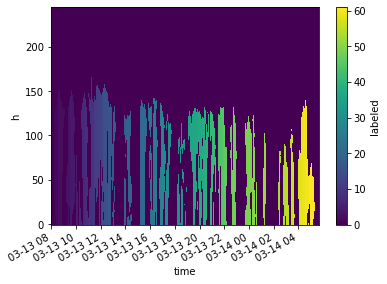

In [5]:
b['labeled'].T.plot()

In [8]:
b['labeled'].values

61

<xarray.DataArray 'h' (h: 245)>
array([  0,   1,   2, ..., 242, 243, 244])
Dimensions without coordinates: h

ValueError: not enough values to unpack (expected 2, got 1)

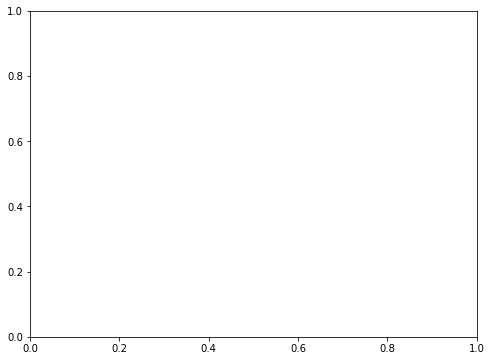

In [17]:
import matplotlib.pyplot as plt
# Create the CFAD plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(b['labeled'].values, 
               b['labeled']['h'].values, 
               np.transpose(np.linspace(0, 61, 61)),
               cmap='viridis', )


In [5]:
import datetime

# Define the start and end times
start_time = datetime.datetime(2023, 3, 13, 8, 0, 0)  # March 13th, 0800 UTC
end_time = datetime.datetime(2023, 3, 14, 5, 40, 0)  # March 14th, 0540 UTC

# Define the time resolution (4 seconds)
time_resolution = datetime.timedelta(seconds=4)

# Initialize a list to store the timestamps
timestamps = []

# Generate the timestamps
current_time = start_time
while current_time <= end_time:
    timestamps.append(int(current_time.timestamp()))
    current_time += time_resolution

# Print the first few timestamps as a sample
print(timestamps[:5])


[1678716000, 1678716004, 1678716008, 1678716012, 1678716016]


In [ ]:
ds

In [3]:
# Define a function to convert time offsets to datetime objects
def convert_time_offset(t):
    # Compute the number of days since January 1, 1
    days = int(t)
    # Compute the number of microseconds (fractions of a second) since midnight
    microseconds = int((t - days) * 86400 * 1e6)
    # Create a datetime object representing January 1, 1
    base_date = datetime.date(1, 1, 1)
    # Add the number of days and microseconds to the base date to get the final datetime object
    return base_date + datetime.timedelta(days=days, microseconds=microseconds)

# Convert the time variable to datetime objects
time_dates = [convert_time_offset(t) for t in ds['time'].values]

# Add the datetime variable to the dataset
ds['time'] = (('time',), time_dates)

time = xr.DataArray(ds.time, dims='time')
ds['time'] = time.astype('datetime64')
ds['time']

OverflowError: days=1581003872; must have magnitude <= 999999999

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

# Define a function to convert time offsets to datetime objects
def convert_time_offset(t):
    # Compute the number of days since January 1, 1
    days = int(t)
    # Compute the number of microseconds (fractions of a second) since midnight
    microseconds = int((t - days) * 86400 * 1e6)
    # Create a datetime object representing January 1, 1
    base_date = datetime.date(1, 1, 1)
    # Add the number of days and microseconds to the base date to get the final datetime object
    return base_date + datetime.timedelta(days=days, microseconds=microseconds)

# Convert the time variable to datetime objects
time_dates = [convert_time_offset(t) for t in interp_ds['jdays'].values]

# Add the datetime variable to the dataset
interp_ds['time'] = (('N_PROF',), time_dates)

time = xr.DataArray(interp_ds.time, dims='N_PROF')
interp_ds['time'] = time.astype('datetime64')
interp_ds['time']